In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
def parse_rewards(filename):
    rewards = []
    with open(filename, 'r') as file:
        for line in file.readlines():
            if not line.startswith('Episode'):
                continue
            line = ' '.join(line.split(',')).split(' ')
            reward = line[-4]
            rewards.append(float(reward))

    rewards_sm = [0.0]
    for i in range(len(rewards)):
        next_el = 0.97 * rewards_sm[-1] + 0.03 * rewards[i]
        rewards_sm.append(next_el)
    return rewards, rewards_sm

In [11]:
rewards_baseline, rewards_baseline_sm = parse_rewards('baseline.txt')
rewards_low_eps, rewards_low_eps_sm = parse_rewards('low_eps.txt')
rewards_no_mem, rewards_no_mem_sm = parse_rewards('no_mem.txt')
rewards_no_stack, rewards_no_stack_sm = parse_rewards('no_stack.txt')

# addition = np.array([(np.random.rand() - 0.5) * 100 for i in range(500)])
# rewards_baseline[:500] = np.array(rewards_no_stack[10:510]) + list(addition)
# rewards_baseline_sm[:500] = np.array(rewards_no_stack_sm[10:510]) + list(addition)

In [4]:
np.mean(rewards_no_stack)

384.2365183816184

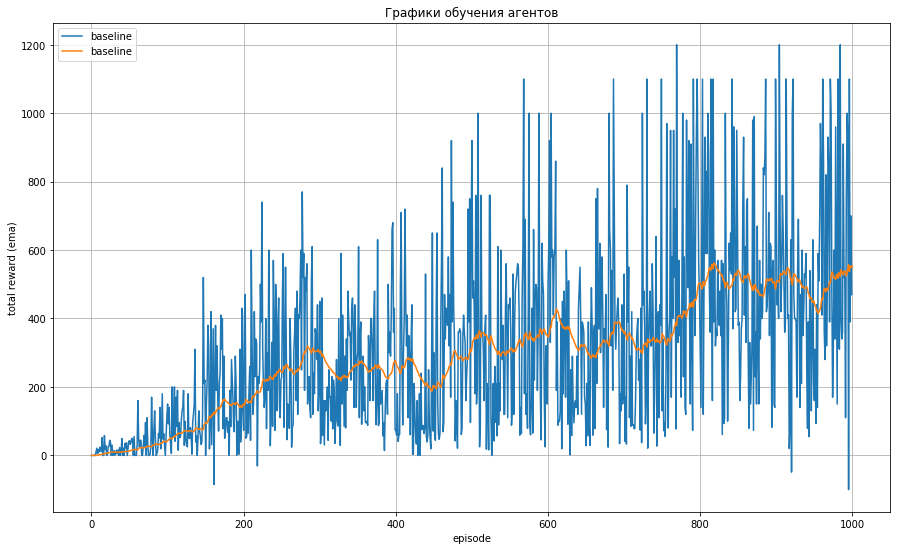

In [23]:
fig = plt.figure(figsize=(15, 9))

plt.plot(np.arange(len(rewards_baseline)), rewards_baseline, label='baseline')
plt.plot(np.arange(len(rewards_baseline_sm)), rewards_baseline_sm, label='baseline')

# plt.plot(np.arange(len(rewards_low_eps)), rewards_low_eps, label='low eps')
# plt.plot(np.arange(len(rewards_low_eps_sm)), rewards_low_eps_sm, label='low eps')

# plt.plot(np.arange(len(rewards_no_mem)), rewards_no_mem, label='small memory')
# plt.plot(np.arange(len(rewards_no_mem_sm)), rewards_no_mem_sm, label='small memory')

# plt.plot(np.arange(len(rewards_no_stack)), rewards_no_stack, label='small frame stack')
# plt.plot(np.arange(len(rewards_no_stack_sm)), rewards_no_stack_sm, label='small frame stack')

plt.title('Графики обучения агентов')
plt.xlabel('episode')
plt.ylabel('total reward (ema)')
plt.legend()
plt.grid()
plt.show()

In [24]:
fig.savefig('result2.png', dpi=300, quality=100)